## Systolic Bubble Sort Implementation (Functional Test)

In [1]:
import random

class PE:
    def __init__(self, value):
        self.value = value

    def compare_and_swap(self, neighbor):
        # Swap if the left value is greater than the right value
        if self.value > neighbor.value:
            self.value, neighbor.value = neighbor.value, self.value

def systolic_bubble_sort(data):
    n = len(data)
    
    # Step 1: Initialize processing elements
    pes = [PE(val) for val in data]
    
    # Step 2: Perform Bubble Sort in systolic style
    for t in range(n - 1):  # Number of passes
        # Odd phase
        for i in range(1, n, 2):
            pes[i - 1].compare_and_swap(pes[i])
        # Even phase
        for i in range(1, n - 1, 2):
            pes[i].compare_and_swap(pes[i + 1])

    # Step 3: Collect sorted result
    return [pe.value for pe in pes]

# Test
if __name__ == "__main__":
    data = random.sample(range(1, 100), 10)
    print("Original:", data)
    sorted_data = systolic_bubble_sort(data)
    print("Sorted  :", sorted_data)


Original: [75, 45, 61, 66, 23, 51, 46, 48, 11, 81]
Sorted  : [11, 23, 45, 46, 48, 51, 61, 66, 75, 81]


## Performance Benchmarking Setup

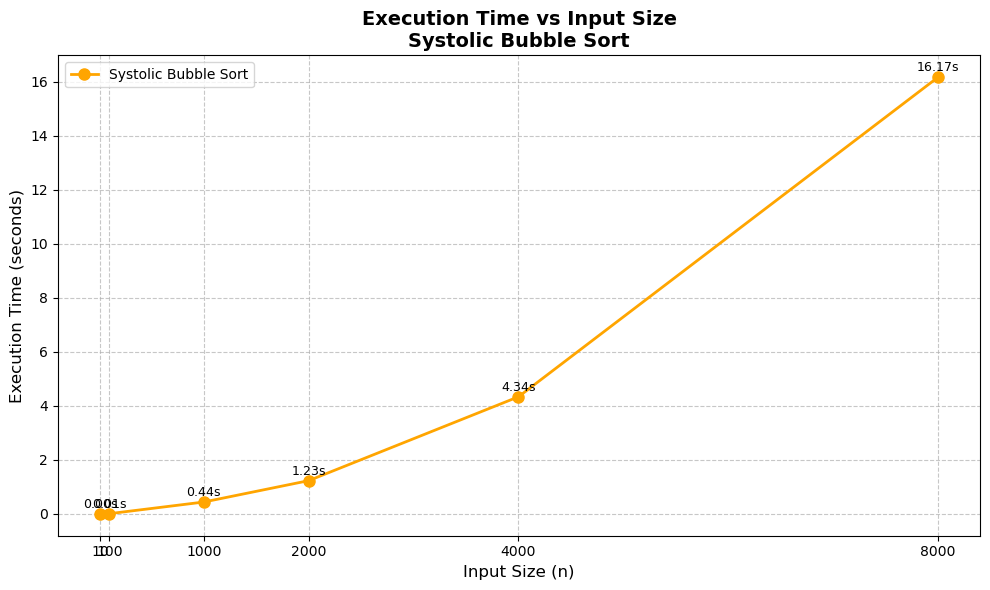

In [3]:
import time
import random
import matplotlib.pyplot as plt

# Define the Processing Element (PE)
class PE:
    def __init__(self, value):
        self.value = value

    def compare_and_swap(self, neighbor):
        if self.value > neighbor.value:
            self.value, neighbor.value = neighbor.value, self.value

# Define systolic bubble sort
def systolic_bubble_sort(data):
    n = len(data)
    pes = [PE(val) for val in data]

    for t in range(n - 1):
        for i in range(0, n - 1, 2):
            pes[i].compare_and_swap(pes[i + 1])
        for i in range(1, n - 1, 2):
            pes[i].compare_and_swap(pes[i + 1])

    return [pe.value for pe in pes]

# Input sizes to test
sizes = [10, 100, 1000, 2000, 4000, 8000]
execution_times = []

# Run benchmark
for size in sizes:
    data = random.sample(range(size * 10), size)
    start = time.time()
    systolic_bubble_sort(data)
    end = time.time()
    execution_times.append(end - start)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, execution_times, marker='o', color='orange', linewidth=2, markersize=8, label='Systolic Bubble Sort')

# Annotate each point with the time
for i, (x, y) in enumerate(zip(sizes, execution_times)):
    plt.text(x, y + 0.1, f"{y:.2f}s", ha='center', va='bottom', fontsize=9)

plt.title('Execution Time vs Input Size\nSystolic Bubble Sort', fontsize=14, fontweight='bold')
plt.xlabel('Input Size (n)', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.xticks(sizes)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


## Visualization of Execution Times

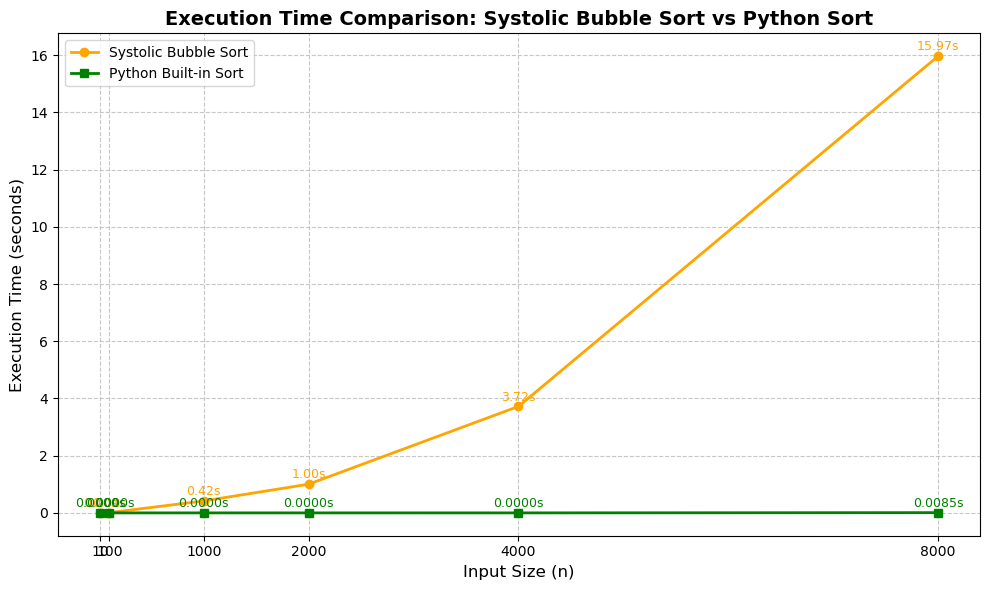

In [4]:
import time
import random
import matplotlib.pyplot as plt

# Define the Processing Element (PE)
class PE:
    def __init__(self, value):
        self.value = value

    def compare_and_swap(self, neighbor):
        if self.value > neighbor.value:
            self.value, neighbor.value = neighbor.value, self.value

# Define systolic bubble sort
def systolic_bubble_sort(data):
    n = len(data)
    pes = [PE(val) for val in data]

    for t in range(n - 1):
        for i in range(0, n - 1, 2):
            pes[i].compare_and_swap(pes[i + 1])
        for i in range(1, n - 1, 2):
            pes[i].compare_and_swap(pes[i + 1])

    return [pe.value for pe in pes]

# Input sizes to test
sizes = [10, 100, 1000, 2000, 4000, 8000]
systolic_times = []
builtin_times = []

# Run benchmark
for size in sizes:
    data = random.sample(range(size * 10), size)

    # Time systolic bubble sort
    data_copy = data.copy()
    start = time.time()
    systolic_bubble_sort(data_copy)
    end = time.time()
    systolic_times.append(end - start)

    # Time built-in Python sort
    data_copy = data.copy()
    start = time.time()
    sorted(data_copy)
    end = time.time()
    builtin_times.append(end - start)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, systolic_times, marker='o', color='orange', linewidth=2, label='Systolic Bubble Sort')
plt.plot(sizes, builtin_times, marker='s', color='green', linewidth=2, label='Python Built-in Sort')

# Annotate each point
for x, y in zip(sizes, systolic_times):
    plt.text(x, y + 0.2, f"{y:.2f}s", ha='center', fontsize=9, color='orange')
for x, y in zip(sizes, builtin_times):
    plt.text(x, y + 0.2, f"{y:.4f}s", ha='center', fontsize=9, color='green')

plt.title('Execution Time Comparison: Systolic Bubble Sort vs Python Sort', fontsize=14, fontweight='bold')
plt.xlabel('Input Size (n)', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(sizes)
plt.tight_layout()
plt.show()
